In [1]:
# pip install scikit-learn
import csv
import random

from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("banknotes.csv")

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,-0.89569,3.00250,-3.606700,-3.44570,1
1,3.47690,-0.15314,2.530000,2.44950,0
2,3.91020,6.06500,-2.453400,-0.68234,0
3,0.60731,3.95440,-4.772000,-4.48530,1
4,2.37180,7.49080,0.015989,-1.74140,0


In [4]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
data.sample(5)

,variance,skewness,curtosis,entropy,class
951,-1.83910,-9.08830,9.24160,-0.10432,1
77,-1.22440,1.74850,-1.48010,-1.41810,1
174,1.34030,4.13230,-4.70180,-2.59870,1
124,-0.88728,2.80800,-3.14320,-1.20350,1
694,5.27560,0.13863,0.12138,1.14350,0


In [7]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [8]:
data.isnull().sum().sum()

0

In [9]:
# Model creation
model1 = Perceptron()
model2 = svm.SVC()
model3 = KNeighborsClassifier(n_neighbors=1)
model4 = GaussianNB()

In [10]:
predictors = data.drop("class",axis=1)
target = data["class"]

X_training,X_testing,y_training,y_testing = train_test_split(predictors,target,test_size=0.25,random_state=None)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_training.shape[0], X_testing.shape[0]))

Training features have 1029 records and Testing features have 343 records.


In [11]:
X_training.head()

,variance,skewness,curtosis,entropy
332,-1.24240,-1.7175,-0.52553,-0.21036
532,3.30040,7.0811,-1.32580,0.22283
595,-3.99340,5.8333,0.54723,-4.93790
1301,-1.57320,1.0636,-0.71232,-0.83880
516,-0.55648,3.2136,-3.30850,-2.79650


In [12]:
X_testing.head()

,variance,skewness,curtosis,entropy
544,-1.7599,11.92110,2.6756,-3.324100
176,4.0102,10.65680,-4.1388,-5.064600
626,4.1529,-3.93580,2.8633,-0.017686
93,-1.4781,0.14277,-1.1622,-0.485790
669,3.7831,10.05260,-3.8869,-3.736600


In [13]:
y_training.head()

332     1
532     0
595     1
1301    1
516     1
Name: class, dtype: int64

In [14]:
y_testing.head()

544    0
176    0
626    0
93     1
669    0
Name: class, dtype: int64

In [15]:
# Train model on training set
model1.fit(X_training, y_training)
model2.fit(X_training, y_training)
model3.fit(X_training, y_training)
model4.fit(X_training, y_training)

GaussianNB()

In [16]:
# Make predictions on the testing set
predictions1 = model1.predict(X_testing)
predictions2 = model2.predict(X_testing)
predictions3 = model3.predict(X_testing)
predictions4 = model4.predict(X_testing)

In [17]:
# Compute how well we performed for perceptron
correct1 = 0
incorrect1 = 0
total1 = 0
for actual, predicted in zip(y_testing, predictions1):
    total1 += 1
    if actual == predicted:
        correct1 += 1
    else:
        incorrect1 += 1
score1 = 100 * (correct1 / total1)
# Print results
print(f"Results for model {type(model1).__name__}")
print(f"Correct: {correct1}")
print(f"Incorrect: {incorrect1}")
print(f"Accuracy:{100 * correct1 / total1:.2f}%")

Results for model Perceptron
Correct: 333
Incorrect: 10
Accuracy:97.08%


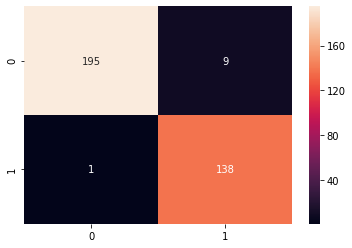

In [18]:
matrix= confusion_matrix(y_testing, predictions1)
plt.subplots(figsize=(6,4))
sns.heatmap(matrix,annot = True, fmt = "d")
plt.show()

In [19]:
precision1 = precision_score(y_testing, predictions1)
print("Precision: ",precision1)

Precision:  0.9387755102040817


In [20]:
recall1 = recall_score(y_testing, predictions1)
print("Recall is: ",recall1)

Recall is:  0.9928057553956835


In [21]:
fs1=(2*precision1*recall1)/(precision1+recall1)
print(fs1)

0.965034965034965


In [22]:
# Compute how well we performed for SVM
correct2 = 0
incorrect2 = 0
total2 = 0
for actual, predicted in zip(y_testing, predictions2):
    total2 += 1
    if actual == predicted:
        correct2 += 1
    else:
        incorrect2 += 1
score2=100 * (correct2 / total2)
# Print results
print(f"Results for model {type(model2).__name__}")
print(f"Correct: {correct2}")
print(f"Incorrect: {incorrect2}")
print(f"Accuracy: {100 * correct2 / total2:.2f}%")

Results for model SVC
Correct: 342
Incorrect: 1
Accuracy: 99.71%


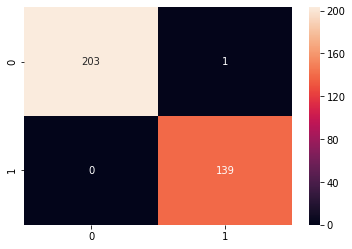

In [23]:
matrix= confusion_matrix(y_testing, predictions2)
plt.subplots(figsize=(6,4))
sns.heatmap(matrix,annot = True, fmt = "d")
plt.show()

In [24]:
precision2 = precision_score(y_testing, predictions2)
print("Precision: ",precision2)

Precision:  0.9928571428571429


In [25]:
recall2 = recall_score(y_testing, predictions2)
print("Recall is: ",recall2)

Recall is:  1.0


In [26]:
fs2=(2*precision2*recall2)/(precision2+recall2)
print(fs2)

0.996415770609319


In [27]:
# Compute how well we performed for KNN
correct3 = 0
incorrect3 = 0
total3 = 0
for actual, predicted in zip(y_testing, predictions3):
    total3 += 1
    if actual == predicted:
        correct3 += 1
    else:
        incorrect3 += 1
score3=100 * (correct3 / total3)
# Print results
print(f"Results for model {type(model3).__name__}")
print(f"Correct: {correct3}")
print(f"Incorrect: {incorrect3}")
print(f"Accuracy: {100 * correct3 / total3:.2f}%")

Results for model KNeighborsClassifier
Correct: 343
Incorrect: 0
Accuracy: 100.00%


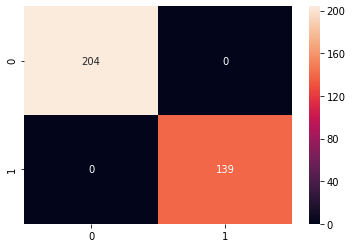

In [28]:
matrix= confusion_matrix(y_testing, predictions3)
plt.subplots(figsize=(6,4))
sns.heatmap(matrix,annot = True, fmt = "d")
plt.show()

In [29]:
precision3 = precision_score(y_testing, predictions3)
print("Precision: ",precision3)

Precision:  1.0


In [30]:
recall3 = recall_score(y_testing, predictions3)
print("Recall is: ",recall3)

Recall is:  1.0


In [31]:
fs3=(2*precision3*recall3)/(precision3+recall3)
print(fs3)

1.0


In [32]:
# Compute how well we performed for naive bayes
correct4 = 0
incorrect4 = 0
total4 = 0
for actual, predicted in zip(y_testing, predictions4):
    total4 += 1
    if actual == predicted:
        correct4 += 1
    else:
        incorrect4 += 1
score4=100 * (correct4 / total4)
# Print results
print(f"Results for model {type(model4).__name__}")
print(f"Correct: {correct4}")
print(f"Incorrect: {incorrect4}")
print(f"Accuracy: {100 * correct4 / total4:.2f}%")

Results for model GaussianNB
Correct: 292
Incorrect: 51
Accuracy: 85.13%


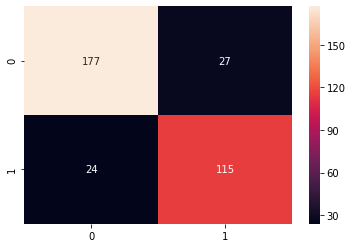

In [33]:
matrix= confusion_matrix(y_testing, predictions4)
plt.subplots(figsize=(6,4))
sns.heatmap(matrix,annot = True, fmt = "d")
plt.show()

In [34]:
precision4 = precision_score(y_testing, predictions4)
print("Precision: ",precision4)

Precision:  0.8098591549295775


In [35]:
recall4 = recall_score(y_testing, predictions4)
print("Recall is: ",recall4)

Recall is:  0.8273381294964028


In [36]:
fs4=(2*precision4*recall4)/(precision4+recall4)
print(fs4)

0.8185053380782918


In [37]:
accuracy = [score1,score2,score3,score4]
classifiers = ['Perceptron', 'Support Vector Machine', "K Nearest Neighbours", "Gaussian Naive Bayes"]

In [38]:
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)  # create a dataframe from accuracy results
summary

,accuracy
Perceptron,97.084548
Support Vector Machine,99.708455
K Nearest Neighbours,100.000000
Gaussian Naive Bayes,85.131195


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

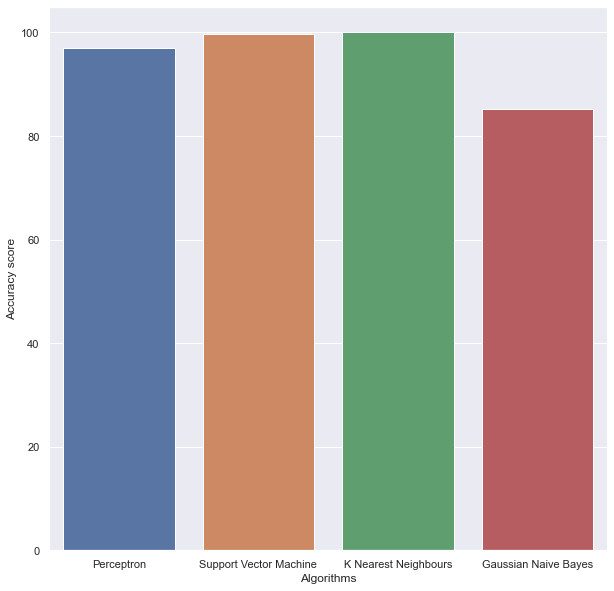

In [39]:
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(classifiers,accuracy)

In [40]:
fs_scores=[fs1,fs2,fs3,fs4]

In [41]:
fs_summary = pd.DataFrame({'f_scores':fs_scores}, index=classifiers)  # create a dataframe from accuracy results
fs_summary

,f_scores
Perceptron,0.965035
Support Vector Machine,0.996416
K Nearest Neighbours,1.000000
Gaussian Naive Bayes,0.818505


<AxesSubplot:xlabel='Algorithms', ylabel='F score'>

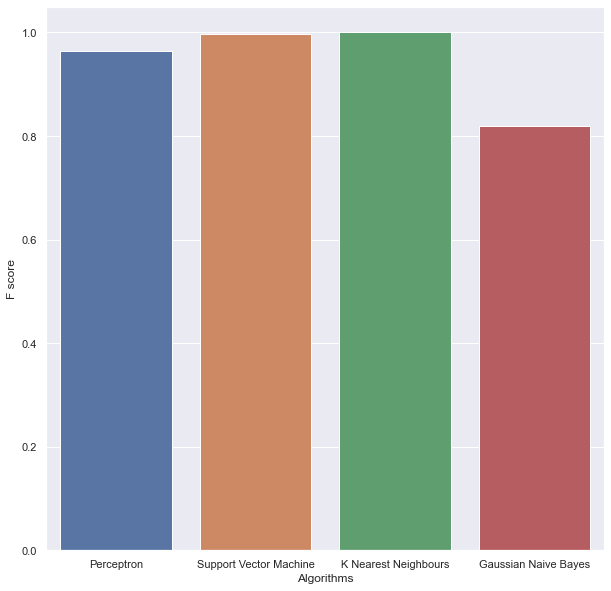

In [42]:
sns.set(rc={'figure.figsize':(10,10)})
plt.xlabel("Algorithms")
plt.ylabel("F score")

sns.barplot(classifiers,fs_scores)

In [43]:
note1=[[0.55298,-3.4619,1.7048,1.1000]]
note2=[[-1.1306,1.8458,-1.3575,-1.3806]]

result1 = model3.predict(note1)
result2 = model3.predict(note2)

print("For note 1 the predicted value of target is: ",result1[0])
print("For note 2 the predicted value of target is: ",result2[0])

For note 1 the predicted value of target is:  1
For note 2 the predicted value of target is:  1
